<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30 non-null     int64 
 1   State       30 non-null     object
 2   TotalPop    30 non-null     int64 
 3   Hispanic    30 non-null     object
 4   White       30 non-null     object
 5   Black       30 non-null     object
 6   Native      30 non-null     object
 7   Asian       30 non-null     object
 8   Pacific     26 non-null     object
 9   Income      30 non-null     object
 10  GenderPop   30 non-null     object
dtypes: int64(2), object(9)
memory usage: 2.7+ KB
None


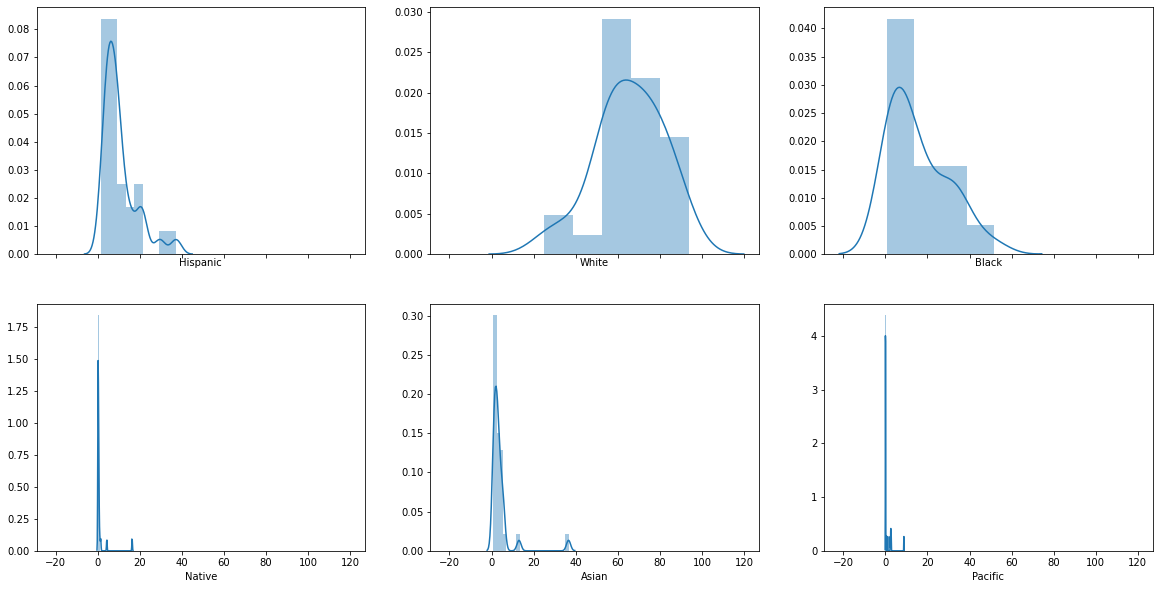

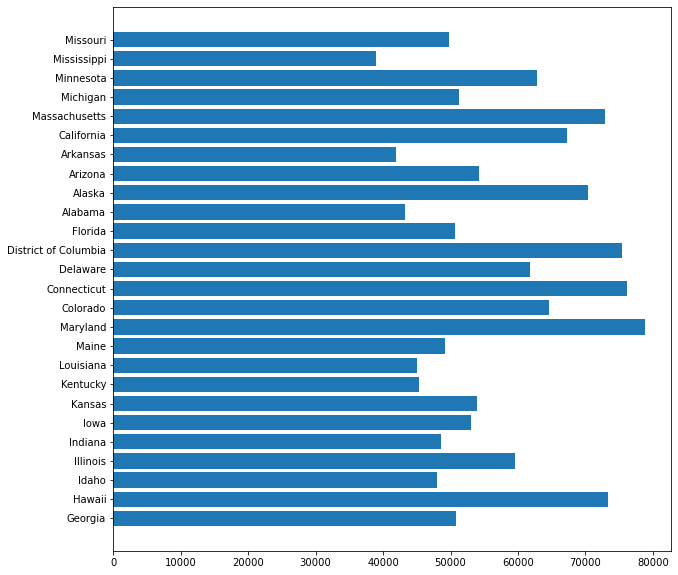

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns

states = glob('states*.csv')

data = []
for state in states:
  df = pd.read_csv(state)
  data.append(df)

us_census = pd.concat(data, ignore_index=True)
print(us_census.info())

us_census['Income'] = us_census.Income.str.strip('$')

us_census[['Men', 'Women']] = us_census.GenderPop.str.split("M_", expand=True)
us_census['Women'] = us_census.Women.str.strip('F')
us_census.head()


us_census[['Men', 'Women', 'Income']] = us_census[['Men', 'Women', 'Income']].apply(pd.to_numeric)


us_census['Women'] = us_census.Women.fillna(us_census.TotalPop - us_census.Men)
us_census.iloc[[11, 24], :]

# us_census.duplicated()

us_census = us_census.drop_duplicates()

us_census.isna().sum()

us_census[us_census.Pacific.isna()]

us_census.loc[:, 'Hispanic':'Asian'] = us_census.loc[:, 'Hispanic':'Asian'].applymap(lambda x: x.strip("%"), )
us_census.loc[:, 'Hispanic':'Asian'] = us_census.loc[:, 'Hispanic':'Asian'].apply(pd.to_numeric)

us_census['Pacific'] = us_census['Pacific'].str.strip('%').apply(pd.to_numeric)

us_census['Pacific'] = us_census['Pacific'].fillna(100.0 - us_census.Hispanic - us_census.White - us_census.Black - us_census.Native - us_census.Asian)

races = us_census.columns[3:-4]

fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharex=True)

for i, ax in enumerate(np.ravel(axes)):
    sns.distplot(us_census[races[i]], label=races[i], ax=ax)
    
plt.show()

fig = plt.figure(figsize=(10, 10))
plt.barh(us_census.State, us_census.Income)
plt.show()